In [46]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [47]:
# Reading the data
TicketData=pd.read_csv('all_titles.csv')

# Printing number of rows and columns
print(TicketData.shape)

# Printing sample rows
TicketData.head(10)

(463, 4)


id                                              title     Discipline 1  \
0  52272  Miller, KG; Janecek, TR; Katz, ME et al. (1987...   Marine Geology   
1  52303  Curry, WB; Duplessy, J-C; Labeyrie, LD et al. ...  Biogeochemistry   
2  54473  Wasmund, N (1998): Phytoplankton measured on w...     Microbiology   
3  55391  Linsley, BK; Thunell, RC (1990): Age model of ...   Marine Geology   
4  77769  Epping, EHG; Helder, W (2002): Water chemistry...        Chemistry   
5  77793  Epping, EHG; Helder, W (2002): Water chemistry...        Chemistry   
6  77910  Grebmeier, JM; McRoy, CP (2002): Benthic respi...  Biogeochemistry   
7  80740  Boyd, PW (2002): Chlorophyll a and primary pro...     Microbiology   
8  82189  Harrison, PJ (2002): Light intensity of P26 (1...     Ocean Optics   
9  89680  Boetius, A; Damm, E (2003): Adenylates of sedi...   Marine Geology   

   Discipline 2  
0           NaN  
1           NaN  
2       Ecology  
3           NaN  
4           NaN  
5           NaN  
6  Microbiology  
7           NaN  
8           NaN  
9           NaN

Discipline 1
Biochemistry              11
Biogeochemistry           77
Biology                    3
Chemical Oceanography      9
Chemistry                  5
Climatology                1
Ecology                   96
Geology                    1
Marine Geology            24
Microbiology              78
Multidisciplinary          1
Ocean Optics               1
Ocean optics               2
Paleoceanography         118
Physical Oceanography     34
Unknown                    2
dtype: int64


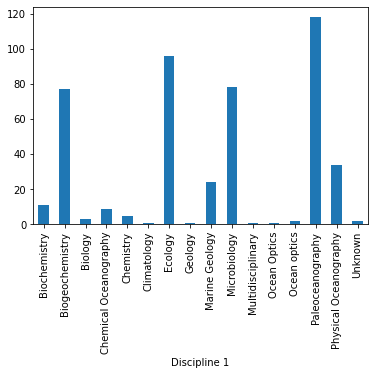

In [66]:

# Number of unique values for urgency column
# You can see there are 3 ticket types
TicketData.drop('Discipline 2', axis=1, inplace=True)
print(TicketData.groupby('Discipline 1').size())
 
# Plotting the bar chart
%matplotlib inline
TicketData.groupby('Discipline 1').size().plot(kind='bar');

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
 
# Ticket Data
corpus = TicketData['title'].values
 
corpus

array(['Miller, KG; Janecek, TR; Katz, ME et al. (1987): (Table 1b) Age model of DSDP Hole 73-524',
       'Curry, WB; Duplessy, J-C; Labeyrie, LD et al. (1988): (Appendix 1) Stable carbon and oxygen isotope ratios of Cibicidoides spp. from sediment core RC11-120',
       'Wasmund, N (1998): Phytoplankton measured on water bottle samples',
       'Linsley, BK; Thunell, RC (1990): Age model of ODP Hole 124-769A',
       'Epping, EHG; Helder, W (2002): Water chemistry at RV08_Adria11_BOTTLE',
       'Epping, EHG; Helder, W (2002): Water chemistry at UR03_Adria6a_TRAP',
       'Grebmeier, JM; McRoy, CP (2002): Benthic respiration at Cruise73_122',
       'Boyd, PW (2002): Chlorophyll a and primary production 14C at station P20 (Feb 1997)',
       'Harrison, PJ (2002): Light intensity of P26 (1990-05-20T09:30)',
       'Boetius, A; Damm, E (2003): Adenylates of sediment core PS2468-1',
       'Boetius, A; Damm, E (2003): Phospholipids of sediment core PS2477-1',
       'Kuhlmann, H; Freude

In [68]:
# Creating the vectorizer
vectorizer = CountVectorizer(stop_words='english')

In [69]:
# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)
X


<463x1973 sparse matrix of type '<class 'numpy.int64'>'
	with 6385 stored elements in Compressed Sparse Row format>

In [70]:
#print(vectorizer.get_feature_names())
 
# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
CountVectorizedData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
CountVectorizedData['Discipline']=TicketData['Discipline 1']
print(CountVectorizedData.shape)
CountVectorizedData.head()

(463, 1974)


01  02  03  04_pc23a  04a  05  06  07  08  09  ...  ziegler  zielinski  \
0   0   0   0         0    0   0   0   0   0   0  ...        0          0   
1   0   0   0         0    0   0   0   0   0   0  ...        0          0   
2   0   0   0         0    0   0   0   0   0   0  ...        0          0   
3   0   0   0         0    0   0   0   0   0   0  ...        0          0   
4   0   0   0         0    0   0   0   0   0   0  ...        0          0   

   zone  zonneveld  zooplankton  zorrilla  µm  δ¹³c  δ¹⁸o       Discipline  
0     0          0            0         0   0     0     0   Marine Geology  
1     0          0            0         0   0     0     0  Biogeochemistry  
2     0          0            0         0   0     0     0     Microbiology  
3     0          0            0         0   0     0     0   Marine Geology  
4     0          0            0         0   0     0     0        Chemistry  

[5 rows x 1974 columns]

In [6]:
!python -m pip install gensim

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\eafzadn\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [72]:
import gensim
#Loading the word vectors from Google trained word2Vec model
GoogleModel = gensim.models.KeyedVectors.load_word2vec_format('C:\\Users\\eafzadn\\Trace\\GoogleNews-vectors-negative300.bin', binary=True)

In [73]:
WordsVocab=CountVectorizedData.columns[:-1]

In [54]:
'RC11' in GoogleModel.key_to_index.keys()

False

In [74]:
# Defining a function which takes text input and returns one vector for each sentence
def FunctionText2Vec(inpTextData):
    # Converting the text to numeric data
    X = vectorizer.transform(inpTextData)
    CountVecData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
    
    # Creating empty dataframe to hold sentences
    W2Vec_Data=pd.DataFrame()
    
    # Looping through each row for the data
    for i in range(CountVecData.shape[0]):

        # initiating a sentence with all zeros
        Sentence = np.zeros(300)

        # Looping thru each word in the sentence and if its present in 
        # the Word2Vec model then storing its vector
        for word in WordsVocab[CountVecData.iloc[i,:]>=1]:
            #print(word)
            if word in GoogleModel.key_to_index.keys():    
                Sentence=Sentence+GoogleModel[word]
        # Appending the sentence to the dataframe
        W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
    return(W2Vec_Data)

In [75]:
# Since there are so many words... This will take some time :( 
# Calling the function to convert all the text data to Word2Vec Vectors
W2Vec_Data=FunctionText2Vec(TicketData['title'])

# Checking the new representation for sentences


In [76]:
W2Vec_Data

0         1         2         3         4         5         6    \
0  -0.493225  1.185181  0.410645  0.867920 -0.211121  0.221313  0.994995   
0  -2.012695  1.498047  0.565826  0.769043 -1.476883  0.342529 -0.587307   
0  -0.338013  0.421875  0.599487  0.203094 -0.552246  0.554688  0.231506   
0  -0.018061  0.585205  0.016357  0.398682 -0.324036 -0.023071 -0.071533   
0  -0.007812  0.259277  0.211914 -0.111328 -0.287598  0.104614 -0.112976   
..       ...       ...       ...       ...       ...       ...       ...   
0  -0.553040  0.317459 -0.505981  1.129883 -0.824829  0.038208 -1.124512   
0   0.419724  1.143982  0.563171  0.592773 -0.909058 -0.196747  0.621704   
0  -0.729004  1.390503  0.662720  0.277588 -0.127930  0.509888  0.442871   
0  -0.786133  0.921631  0.758301 -0.252441 -0.048584  0.025635 -0.413330   
0  -0.311768  0.768179  0.798576  0.152588  0.342773  0.309021  0.119873   

         7         8         9    ...       290       291       292       293  \
0  -2.158691 -0.058807  0.512817  ... -0.012146 -0.049438 -1.063721 -0.005127   
0  -2.005859 -0.148315  1.334534  ... -0.313110 -0.108643 -0.267944  0.040543   
0  -1.105469  0.342041  1.069336  ... -0.179443 -0.393921 -0.026855 -0.110474   
0  -0.729004  0.429443  0.478027  ...  0.306396  0.927734 -0.577881 -0.274963   
0  -0.842773 -0.065430  0.071411  ... -0.217773  0.110352 -0.413086  0.028809   
..       ...       ...       ...  ...       ...       ...       ...       ...   
0  -1.069824  0.274658  0.903107  ... -0.512756  0.647003 -0.077820  0.344116   
0  -2.018066  0.714600  2.074707  ... -0.838806 -0.416443 -0.530762  0.822266   
0  -1.142090  0.224854  0.975952  ... -0.181213  0.300751 -0.742065 -0.637558   
0  -0.739990 -0.298306  0.863037  ...  0.364685  0.464478  0.340942  0.788574   
0  -2.303757 -0.362061  0.915894  ...  0.292297  0.434204 -0.526123  1.228760   

         294       295       296       297       298       299  
0  -0.564087 -0.406006 -1.668800 -0.208252 -0.369715  0.688171  
0  -1.567261  0.044189 -1.610352  0.881348  1.508911  0.938004  
0  -0.349518 -0.466064 -0.473633 -0.205353  0.511353 -0.772339  
0  -0.217529 -0.166748 -0.704079 -0.403320 -0.747803  0.208496  
0  -0.087952  0.073303 -0.024414 -0.201477  0.413086 -0.050537  
..       ...       ...       ...       ...       ...       ...  
0  -0.124542 -0.857819  0.377441 -0.928345  1.383831  0.499207  
0  -0.858406 -0.057003  0.189819  0.324112  0.124878  0.659546  
0  -0.725098  0.314209 -0.355225 -0.139160 -0.013428  0.201111  
0  -0.230469  0.266235 -0.096191  0.140625  0.220703  0.796143  
0  -1.245605 -0.732605 -0.787109 -0.096436  0.768799  1.414551  

[463 rows x 300 columns]

In [77]:
# Adding the target variable
W2Vec_Data.reset_index(inplace=True, drop=True)
W2Vec_Data['Discipline']=CountVectorizedData['Discipline']

# Assigning to DataForML variable
DataForML=W2Vec_Data
DataForML.head()

0         1         2         3         4         5         6  \
0 -0.493225  1.185181  0.410645  0.867920 -0.211121  0.221313  0.994995   
1 -2.012695  1.498047  0.565826  0.769043 -1.476883  0.342529 -0.587307   
2 -0.338013  0.421875  0.599487  0.203094 -0.552246  0.554688  0.231506   
3 -0.018061  0.585205  0.016357  0.398682 -0.324036 -0.023071 -0.071533   
4 -0.007812  0.259277  0.211914 -0.111328 -0.287598  0.104614 -0.112976   

          7         8         9  ...       291       292       293       294  \
0 -2.158691 -0.058807  0.512817  ... -0.049438 -1.063721 -0.005127 -0.564087   
1 -2.005859 -0.148315  1.334534  ... -0.108643 -0.267944  0.040543 -1.567261   
2 -1.105469  0.342041  1.069336  ... -0.393921 -0.026855 -0.110474 -0.349518   
3 -0.729004  0.429443  0.478027  ...  0.927734 -0.577881 -0.274963 -0.217529   
4 -0.842773 -0.065430  0.071411  ...  0.110352 -0.413086  0.028809 -0.087952   

        295       296       297       298       299       Discipline  
0 -0.406006 -1.668800 -0.208252 -0.369715  0.688171   Marine Geology  
1  0.044189 -1.610352  0.881348  1.508911  0.938004  Biogeochemistry  
2 -0.466064 -0.473633 -0.205353  0.511353 -0.772339     Microbiology  
3 -0.166748 -0.704079 -0.403320 -0.747803  0.208496   Marine Geology  
4  0.073303 -0.024414 -0.201477  0.413086 -0.050537        Chemistry  

[5 rows x 301 columns]

In [104]:
# Separate Target Variable and Predictor Variables
TargetVariable=DataForML.columns[-1]
Predictors=DataForML.columns[:-1]

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=428)

# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(439, 300)
(439,)
(24, 300)
(24,)


In [105]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization is used because we need to fit Naive Bayes

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=428)

# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(439, 300)
(439,)
(24, 300)
(24,)


In [106]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
#clf = GaussianNB()
clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=5, scoring='f1_weighted')
print('\nAccuracy values for 5-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

MultinomialNB()
                       precision    recall  f1-score   support

         Biochemistry       0.00      0.00      0.00         0
      Biogeochemistry       0.50      0.10      0.17        10
Chemical Oceanography       1.00      1.00      1.00         1
              Ecology       0.00      0.00      0.00         4
         Microbiology       0.38      1.00      0.55         3
     Paleoceanography       0.38      0.75      0.50         4
Physical Oceanography       0.00      0.00      0.00         2

             accuracy                           0.33        24
            macro avg       0.32      0.41      0.32        24
         weighted avg       0.36      0.33      0.26        24

[[0 0 0 0 0 0 0]
 [2 1 0 1 4 2 0]
 [0 0 1 0 0 0 0]
 [1 0 0 0 1 2 0]
 [0 0 0 0 3 0 0]
 [1 0 0 0 0 3 0]
 [0 1 0 0 0 1 0]]
Accuracy of the model on Testing Sample Data: 0.26

Accuracy values for 5-fold Cross Validation:
 [0.30529866 0.37702192 0.30111005 0.2928429  0.30633152]

Final Averag

In [107]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=15)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
#print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
#print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

KNeighborsClassifier(n_neighbors=15)
                       precision    recall  f1-score   support

      Biogeochemistry       0.67      0.20      0.31        10
Chemical Oceanography       0.00      0.00      0.00         1
              Ecology       0.50      0.25      0.33         4
       Marine Geology       0.00      0.00      0.00         0
         Microbiology       0.25      0.67      0.36         3
     Paleoceanography       0.30      0.75      0.43         4
Physical Oceanography       0.00      0.00      0.00         2

             accuracy                           0.33        24
            macro avg       0.25      0.27      0.20        24
         weighted avg       0.44      0.33      0.30        24

[[2 0 0 0 5 3 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 1 2 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 2 0 0]
 [0 0 0 1 0 3 0]
 [0 0 0 0 0 2 0]]
Accuracy of the model on Testing Sample Data: 0.3


DecisionTreeClassifier(max_depth=20)
                       precision    recall  f1-score   support

      Biogeochemistry       0.17      0.10      0.12        10
              Biology       0.00      0.00      0.00         0
Chemical Oceanography       0.00      0.00      0.00         1
              Ecology       0.00      0.00      0.00         4
       Marine Geology       0.00      0.00      0.00         0
         Microbiology       0.17      0.33      0.22         3
     Paleoceanography       0.25      0.25      0.25         4
Physical Oceanography       0.00      0.00      0.00         2

             accuracy                           0.12        24
            macro avg       0.07      0.09      0.07        24
         weighted avg       0.13      0.12      0.12        24

[[1 0 0 2 2 4 1 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [2 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0]
 [1 1 0 0 0 1 0 0]
 [1 0 0 1 1 0 1 0]
 [1 0 0 0 0 0 1 0]]
Accuracy of the model on Testing Sample Data: 0.12


<AxesSubplot:>

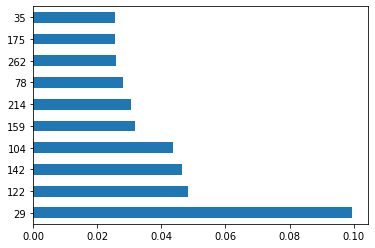

In [108]:
# Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=20,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
#from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test


In [109]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=2)
clf = AdaBoostClassifier(n_estimators=20, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.01, n_estimators=20)
                       precision    recall  f1-score   support

      Biogeochemistry       0.00      0.00      0.00        10
Chemical Oceanography       0.00      0.00      0.00         1
              Ecology       0.14      0.25      0.18         4
         Microbiology       0.17      0.33      0.22         3
     Paleoceanography       0.27      0.75      0.40         4
Physical Oceanography       0.00      0.00      0.00         2

             accuracy                           0.21        24
            macro avg       0.10      0.22      0.13        24
         weighted avg       0.09      0.21      0.12        24

[[0 0 2 4 4 0]
 [0 0 1 0 0 0]
 [0 0 1 1 2 0]
 [0 0 2 1 0 0]
 [0 0 1 0 3 0]
 [0 0 0 0 2 0]]
Accuracy of the model on Testing Sample Data: 0.12


In [110]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=10,penalty='l2', solver='newton-cg')
 
# Printing all the parameters of logistic regression
# print(clf)
 
# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
 
# Generating predictions on testing data
prediction=LOG.predict(X_test)
# Printing sample values of prediction in Testing data
TestingData=pd.DataFrame(data=X_test, columns=Predictors)
TestingData['TargetVariable']=y_test
TestingData['Prediction']=prediction
print(TestingData.head())
 
 
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))
 
## Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

          0         1         2         3         4         5         6  \
0  0.561121  0.545147  0.417784  0.292875  0.109280  0.509502  0.551870   
1  0.199304  0.403181  0.566080  0.468173  0.714883  0.349559  0.782124   
2  0.664976  0.218981  0.317351  0.376803  0.545876  0.367562  0.776553   
3  0.555487  0.324607  0.491748  0.437109  0.402921  0.361572  0.613565   
4  0.402558  0.666299  0.749784  0.049825  0.620832  0.772709  0.343155   

          7         8         9  ...       292       293       294       295  \
0  0.465119  0.330150  0.539128  ...  0.876868  0.563500  0.000000  0.803469   
1  0.331019  0.472344  0.285788  ...  0.427219  0.386821  0.267440  0.683307   
2  0.751438  0.634063  0.423510  ...  0.523583  0.429745  0.603762  0.305430   
3  0.646810  0.318510  0.456285  ...  0.708851  0.370454  0.467928  0.551872   
4  0.574604  0.347999  0.509276  ...  0.398923  0.432551  0.657551  0.703690   

        296       297       298       299         TargetVariable  \


In [111]:
# Generating the Logistic model on full data
# This is the best performing model
clf = LogisticRegression(C=10,penalty='l2', solver='newton-cg')
FinalModel=clf.fit(X,y)

In [112]:
# Defining a function which converts words into numeric vectors for prediction
def FunctionPredictUrgency(inpText):
    
    # Generating the Glove word vector embeddings
    X=FunctionText2Vec(inpText)
    #print(X)
    
    # If standardization/normalization was done on training
    # then the above X must also be converted to same platform
    # Generating the normalized values of X
    X=PredictorScalerFit.transform(X)
    
    # Generating the prediction using Naive Bayes model and returning
    Prediction=FinalModel.predict(X)
    Result=pd.DataFrame(data=inpText, columns=['Text'])
    Result['Prediction']=Prediction
    return(Result)

In [113]:
# Calling the function
NewTicket=["Grelaud, M; Beaufort, L; Cuven, S et al. (2009): (Table 1) Age determination of sediment core MD02-2503"]
FunctionPredictUrgency(inpText=NewTicket)

Text        Prediction
0  Grelaud, M; Beaufort, L; Cuven, S et al. (2009...  Paleoceanography

In [114]:
import numpy as np
# Calling the function
NewTicket=pd.read_csv('unknown.csv')
#NewTicket=["Mix, AC; Ruddiman, WF; McIntyre, A (1986): (Table 2) Age model of sediment core V22-222"]
NewTicket
NT=NewTicket['title'].values
len(NT)
#for tick in NT:
     
PredictionResults=FunctionPredictUrgency(inpText=NT)


PredictionResults
NT
PredictionResults.to_csv('PredictionResults_word2vec.csv',index=False)